# BL40A2010 Introduction to IoT-Based Systems

## Assignment 1, 12.01.2023

### Author: Jesse Peltola, 0523140

**(1) Analyze an electric heater as a system following Example 1.1.**

**Answer:**

An electric heater as a system:

OP *Peculiar operation:* Convert electrical power into heat energy

C1 *Conditions of production:* A heater needs electrical resistance, a power to regulate temparature. In addition, a  thermostat that plays the role of the temperature maestro, ensuring it's not too hot or too cold.

C2 *Conditions of reproduction:* Connection to power socket, regular check-up

C3 *External conditions:* Availability of electricy, safety regulations, the potential local climate conditions. 

**(2) Give one example for each scientific rationalities presented in Section 1.2.1 similar to Example 1.2.** 

Answer: 

*Classical:* Analyzing the electric consumption in past years and observing the abnormal effects

*Non-classical:* Studying combinations of machine learning in software engineering. 

*Interventionist:*  Public health testing for obesity. 


**(3) Download the air temperature data of one year from [FMI](http://en.ilmatieteenlaitos.fi/download-observations#!/) at the city/region you currently live. Make four (arbitrary) time series plots for one year, one month, one week and one day. Besides, for each one of these time series, compute the average temperature, and plot it in the respective plot as a constant line.**

*Hint:* Code like in the tutorial notebook.

In [2]:
pip install -r requirements.txt

                                              0.0/10.6 MB ? eta -:--:--
                                              0.2/10.6 MB 5.1 MB/s eta 0:00:03
     -                                        0.5/10.6 MB 6.0 MB/s eta 0:00:02
     ---                                      0.9/10.6 MB 6.8 MB/s eta 0:00:02
     ----                                     1.3/10.6 MB 7.3 MB/s eta 0:00:02
     ------                                   1.8/10.6 MB 8.0 MB/s eta 0:00:02
     --------                                 2.3/10.6 MB 8.7 MB/s eta 0:00:01
     ----------                               2.9/10.6 MB 9.1 MB/s eta 0:00:01
     ------------                             3.4/10.6 MB 9.4 MB/s eta 0:00:01
     --------------                           4.0/10.6 MB 9.7 MB/s eta 0:00:01
     ----------------                         4.5/10.6 MB 9.9 MB/s eta 0:00:01
     -------------------                      5.1/10.6 MB 10.1 MB/s eta 0:00:01
     ---------------------                    5.6/10.6 MB 


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np 

# Read the data
TemperaturesData = pd.read_csv("airtemp-2023-HKI-airport_2.csv", dayfirst=True, sep=",", header=0, 
                               decimal=b",", usecols=[0,1,2,3,4])

TemperaturesData["Date"] = pd.to_datetime(TemperaturesData[['Year', 'Month', 'Day', 'Time']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d-%H:%M')
# Dropping the unnecessary columns
TemperaturesData.drop(['Year', 'Month', 'Day', 'Time'], axis = 1, inplace = True) 
# Set the new 'Datetime' column as the index
TemperaturesData.set_index('Date', inplace=True)
TemperaturesData['Air temperature'] = pd.to_numeric(TemperaturesData["Air temperature"], errors="coerce")
TemperaturesData.head()

,Air temperature
Date,
2023-01-01 00:00:00,4.0
2023-01-01 01:00:00,3.8
2023-01-01 02:00:00,3.5
2023-01-01 03:00:00,2.3
2023-01-01 04:00:00,1.8


-0.325

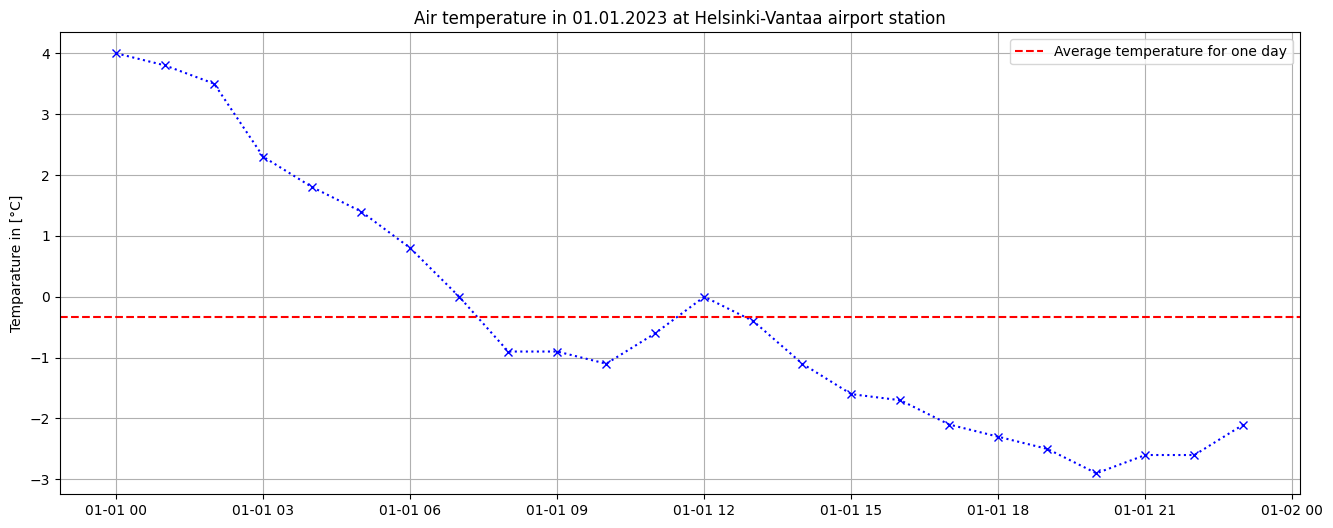

In [155]:
#One day

#Firstly, calculating the average temperature for one day
one_day_avg = TemperaturesData['2023-01-01':'2023-01-01'].mean()
one_day_avg = one_day_avg["Air temperature"]
display(one_day_avg)
plt.figure(figsize=(16, 6))

plt.plot(TemperaturesData['2023-01-01':'2023-01-01'],  color="blue", marker="x", linestyle=":")
plt.axhline(y = one_day_avg, color="r", linestyle="--", label="Average temperature for one day")
plt.title("Air temperature in 01.01.2023 at Helsinki-Vantaa airport station")
plt.ylabel("Temparature in [°C]")
plt.grid(True)
plt.legend()
plt.show()

#

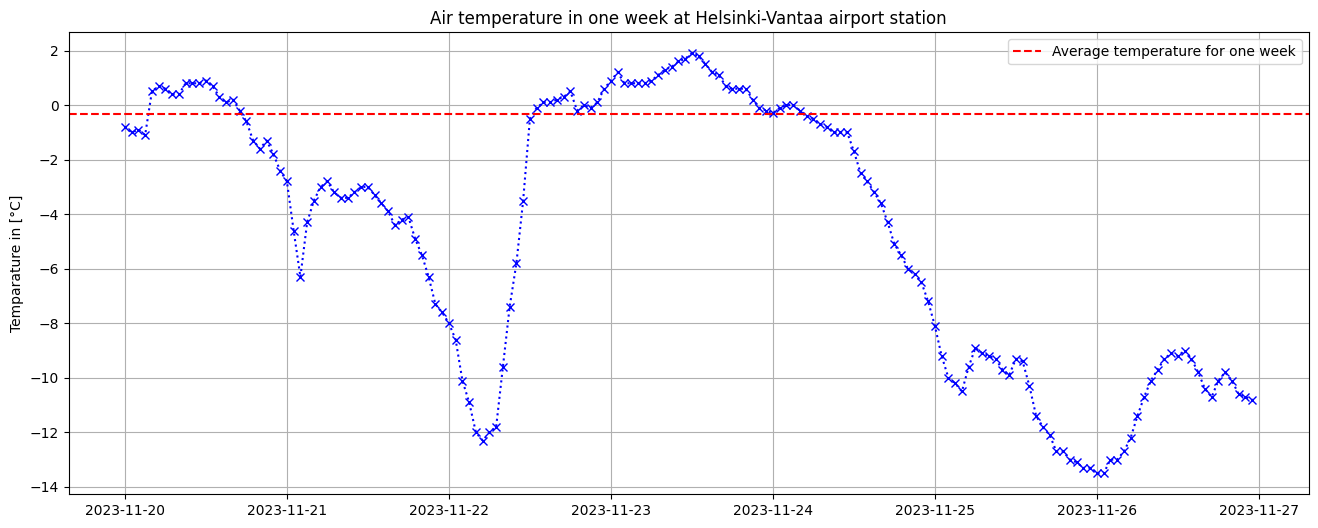

In [156]:
#One week

#Calculating one week average temperature
one_week_avg = TemperaturesData['2023-11-20':'2023-11-26'].mean()
one_week_avg = one_week_avg["Air temperature"]
plt.figure(figsize=(16, 6))
plt.plot(TemperaturesData['2023-11-20':'2023-11-26'], color="blue", marker="x", linestyle=":")
plt.axhline(y = one_day_avg, color="r", linestyle="--", label="Average temperature for one week")
plt.title("Air temperature in one week at Helsinki-Vantaa airport station")
plt.ylabel("Temparature in [°C]")
plt.legend()
plt.grid(True)
plt.show()

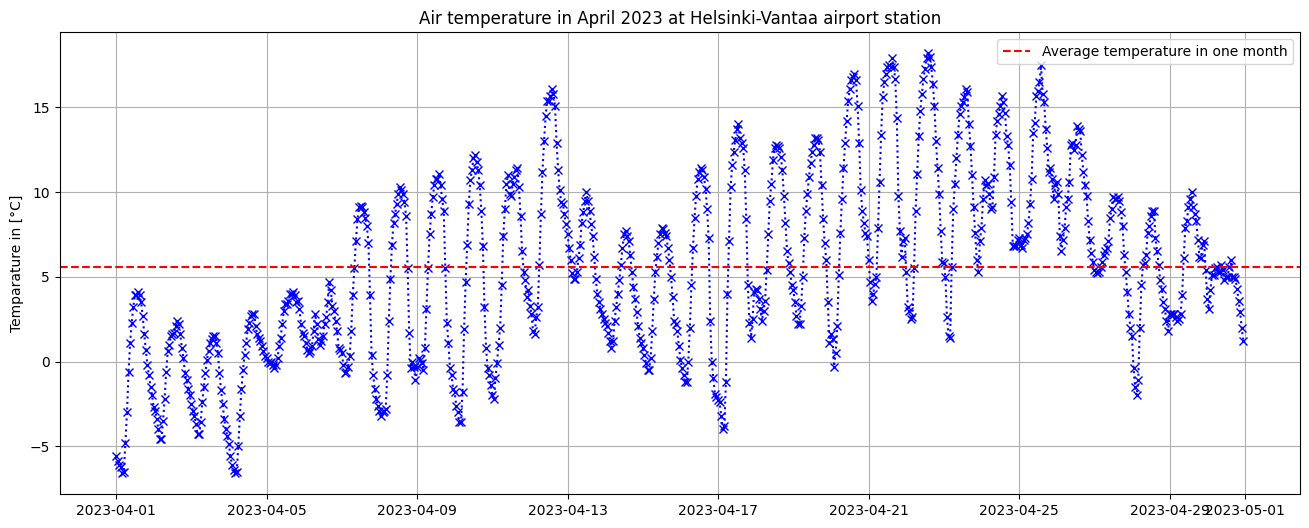

In [154]:
#One month

one_month_avg = TemperaturesData['2023-04':'2023-04-30'].mean()
one_month_avg = one_month_avg["Air temperature"]
plt.figure(figsize=(16, 6))
plt.plot(TemperaturesData['2023-04':'2023-04-30'], color="blue", marker="x", linestyle=":")
plt.axhline(y=one_month_avg, color="r", linestyle="--", label="Average temperature in one month")
plt.title("Air temperature in April 2023 at Helsinki-Vantaa airport station")
plt.ylabel("Temparature in [°C]")
plt.legend()
plt.grid(True)
plt.show()

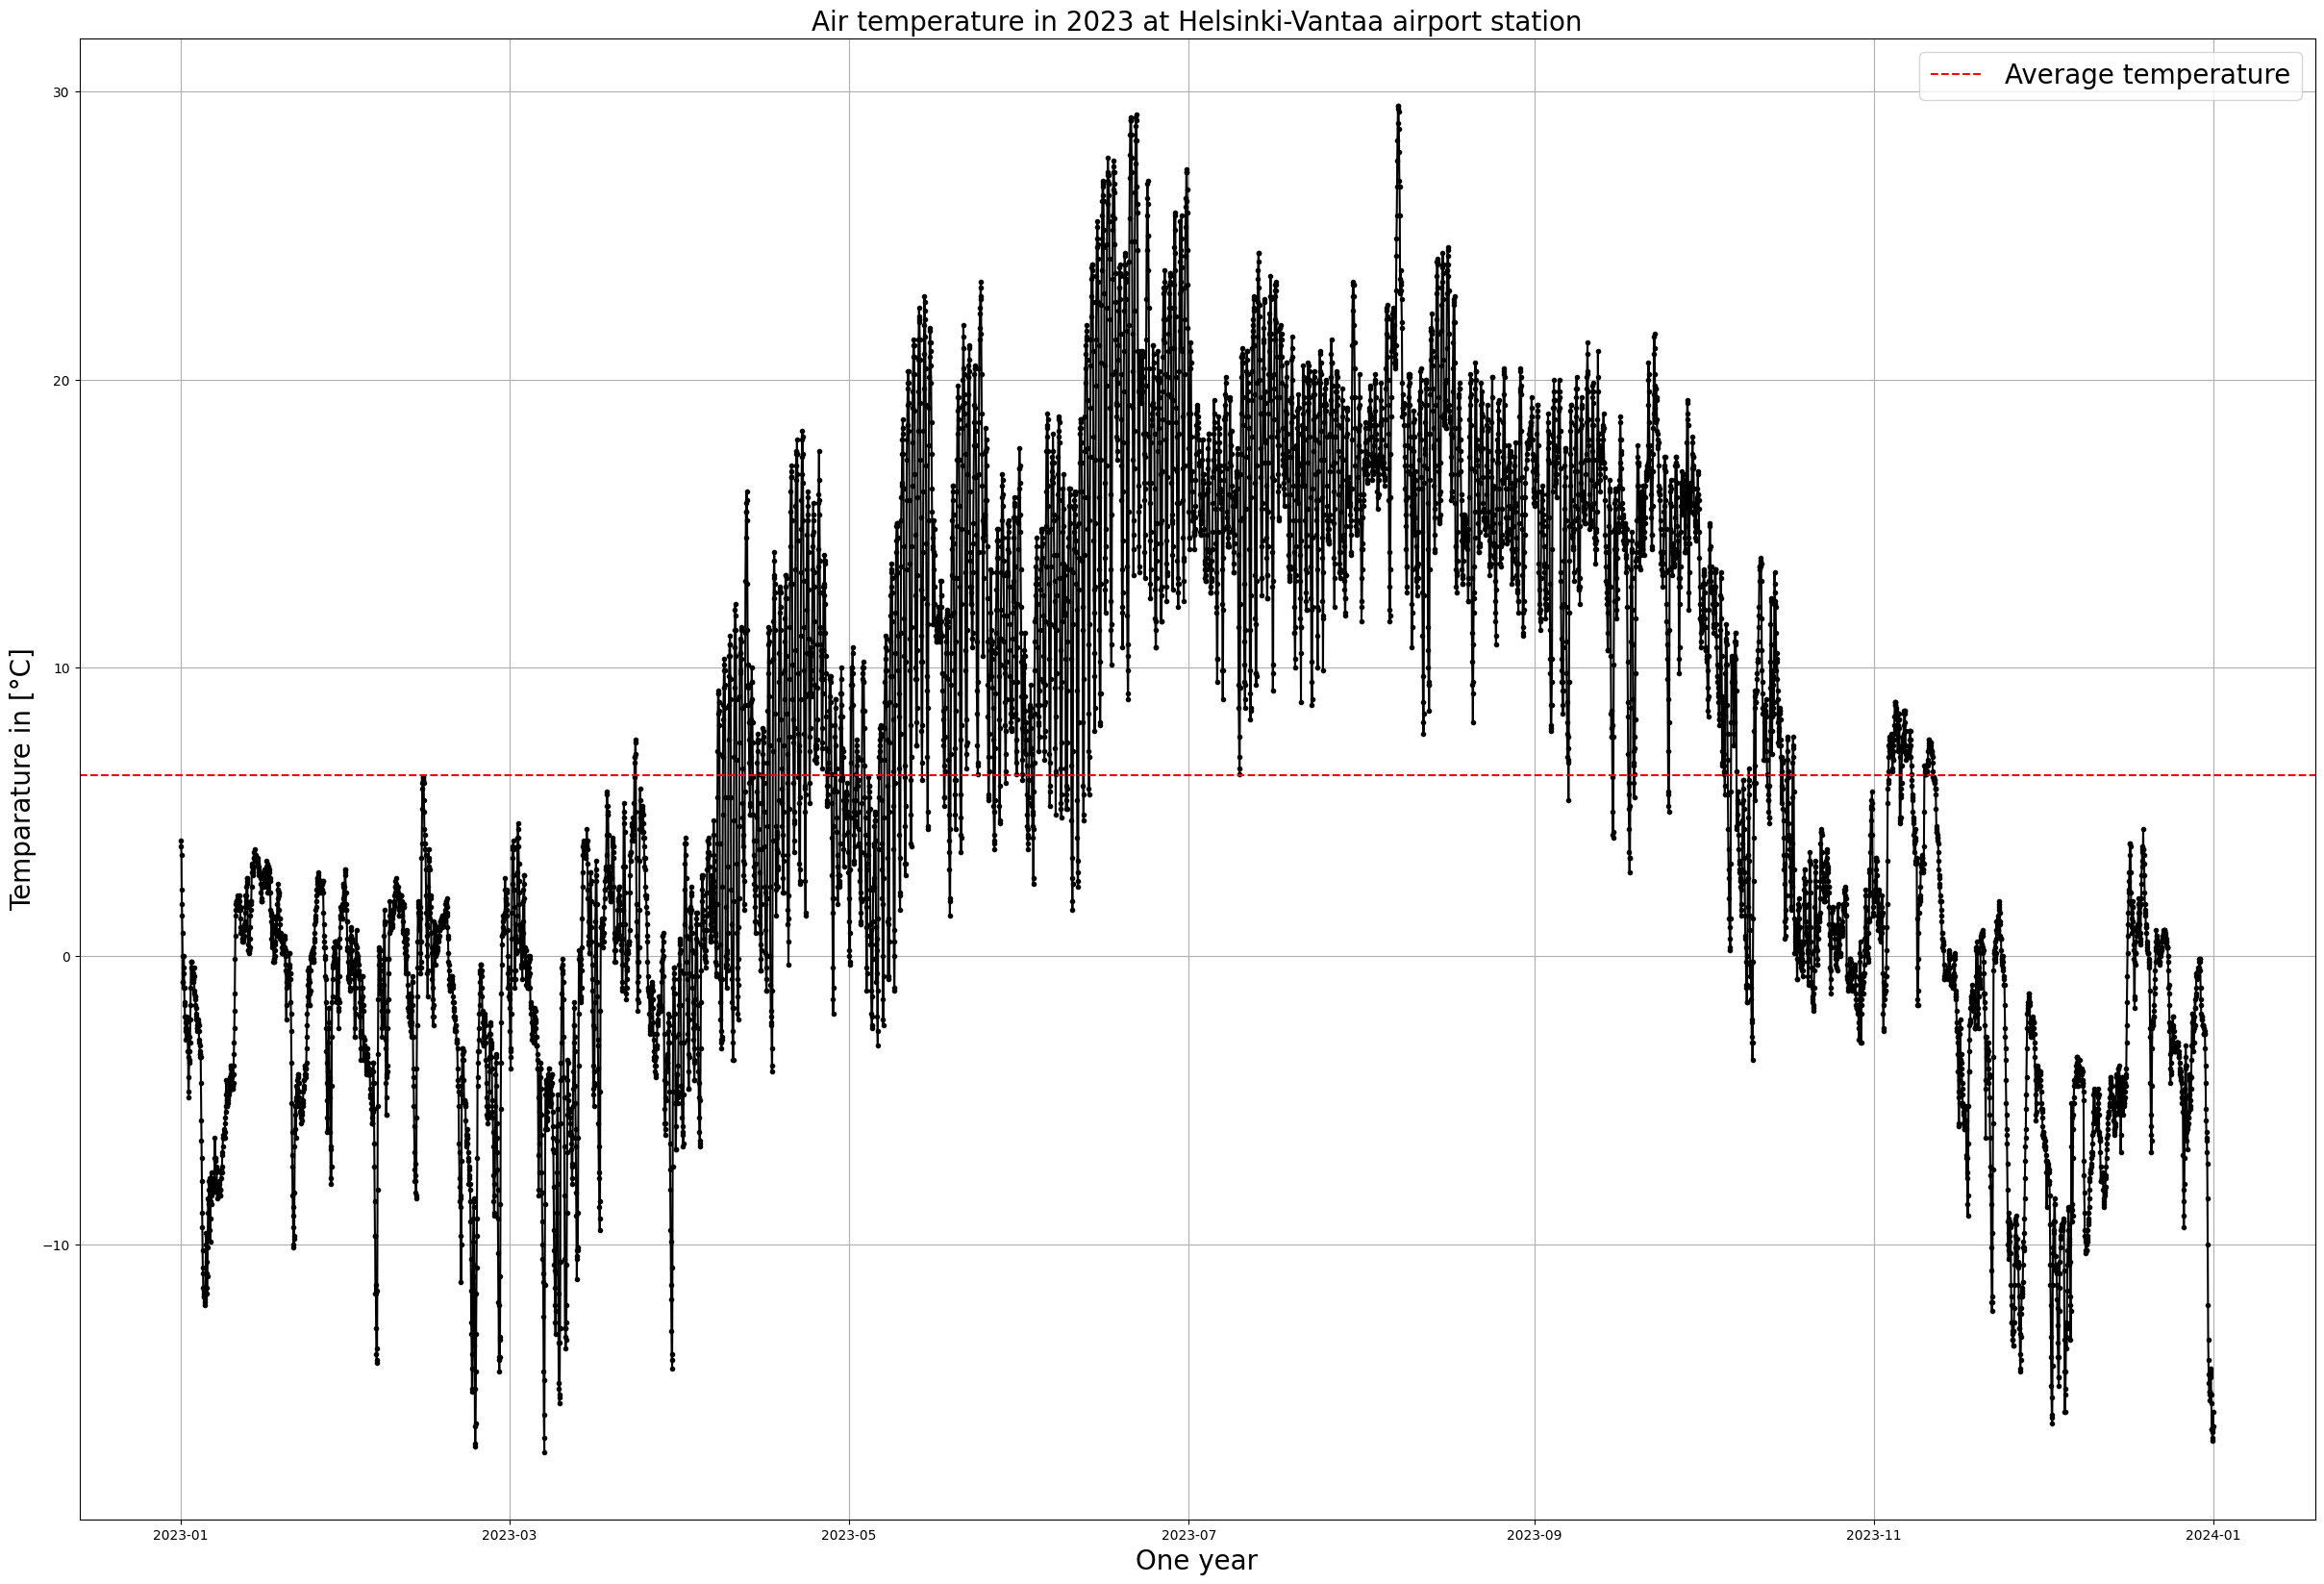

In [160]:
#One year

one_year_avg = TemperaturesData.mean()
one_year_avg = one_year_avg["Air temperature"]
plt.figure(figsize=(30, 20))
plt.plot(TemperaturesData['2023':'2023'], color="black", marker=".", linestyle="-")
plt.axhline(y=one_year_avg, color="r", linestyle="--", label="Average temperature")
plt.title("Air temperature in 2023 at Helsinki-Vantaa airport station", fontsize=20)
plt.ylabel("Temparature in [°C]",fontsize=20)
plt.xlabel("One year", fontsize=20)

plt.legend(fontsize=20)
plt.grid(True)
plt.show()

**(4) Consider a house with an electric heater. How the electricity consumption of the heater would be affected by the outside air temperature? Discuss about 3 current heating methods and their differences.**

**Answer:** When the outside air temperature is colder, the electric heater needs to operate more frequency and for longer to counter the the increased temperature differential between the inside and outside enviroments. This lead the electric heater to consume more electricty. If outside air temperature is similar than a room temperature, the thermostat will either turn off or operate until the room temperature is met. 

Three current heating methods can be electric heater, heat pumps and gas heating. Electric heater convert electrical energy into heat. It is quick to heat up and does not need e.g. storage for gas. Gas heating use natural gas to generate heat. This is more cost-effective compared to electric heater and can heat more spaces. Heat pumps transfer heat from the outside to the inside for heating or vice versa. This is the most energy-efficient than other methods.

